In [1]:
import os, base64

import numpy as np

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from ivrl_helper import plot_spectrum

In [2]:
resourse_path = 'np_resources/'

# Illuminants

Perfectly white light has equal power in all wavelengths of light. In reality, light sources have non-uniform spectral power distirbutions, i.e., they vary in the amount of power they emit at different wavelengths $\lambda$.

These files listen below contain the spectral power distribution $E(\lambda)$ of various light sources.

In [3]:
!ls $resourse_path'illuminants/'

A.npy  D50.npy	D65.npy  F2.npy


In [4]:
illuminant = np.load(resourse_path + 'illuminants/D65.npy')
print(illuminant.shape)

(531, 2)


`illuminant` contains two columns. The first column specifies a wavelength and the second column specifies the relative power measured at that wavelength.

_Note:_ the provided illuminent data files may differ in the grid of wavelengths measured.

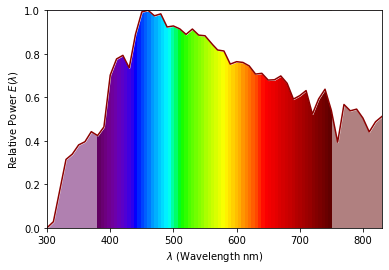

In [5]:
plot_spectrum(illuminant[:,0], illuminant[:,1], ylabel='Relative Power $E(\lambda)$')

In the plot above we show the correspondence between wavelength and the _perceived_ color of light. Note that light sources often emit light at wavelengths outside the visible spectrum, i.e., $\lambda<380$ or $\lambda>740$.

# Reflectance

When light hits an object, some wavelengths get absorbed by the object and some get reflected away. The object thus serves as a filter on the lightsource, a behavior characterized by its _reflectance_ property.

By shining a white light at an object, its reflectance can be measured at various wavelengths. The files listed below contain _hyperscpetral_ images, i.e., measurements of reflectance at various wavelengths.

In [6]:
!ls $resourse_path'spectral_images/'

CDREF31_persilcolour.npy  CDREF31_unclebens.npy


In [7]:
image_file = 'CDREF31_persilcolour.npy'

wavelengths = np.arange(400,710,10)
image = np.load(os.path.join(resourse_path, 'spectral_images', image_file))
print(image.shape)

(31, 256, 336)


`image` is a 3-dimensional array, where the dimension 0 corresponds to the 31 `wavelengths` at which reflectance was measured. Dimensions 1 and 2 are spatial dimensions of the captured image.

To get an idea of the object being photographed, we visualize below the average intensity, averaged over all wavelengths.

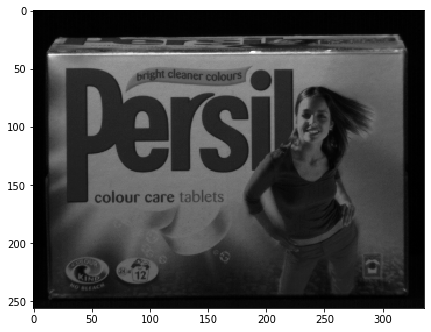

In [8]:
plt.figure(figsize=(7,6))
plt.imshow(image.mean(0), cmap='Greys_r')

By choosing a spacific pixel location $x$, we can visualize the relative reflectance $S(x, \lambda)$ along the spectrum at that position (e.g., 50,130):

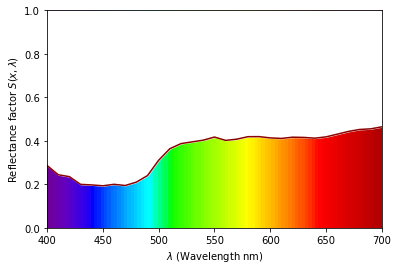

In [9]:
plt.figure()
plot_spectrum(wavelengths, image[:,50,130], ylabel='Reflectance factor $S(x, \lambda)$')

Below we show the reflectance measured at various spatial positions.<br>
Can you tell which percieved colors these reflectances correspond to? Set  `show_color_labels = True`  to reveal the answers

In [10]:
show_color_labels = False

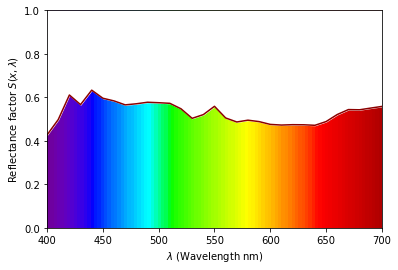

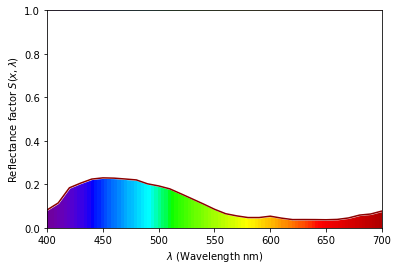

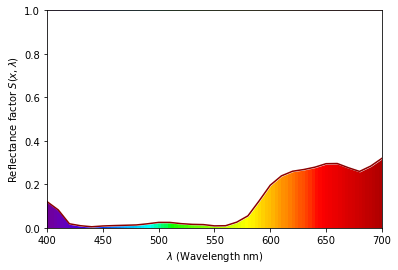

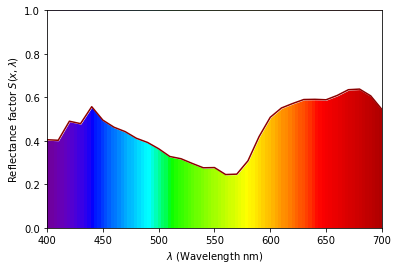

In [11]:
if image_file == 'CDREF31_persilcolour.npy':
    plt.figure()
    plot_spectrum(wavelengths, image[:,40,15], ylabel='Reflectance factor $S(x, \lambda)$')
    if show_color_labels:
        plt.title(base64.b64decode(b'V2hpdGUoLWlzaCk=').decode())

    plt.figure()
    plot_spectrum(wavelengths, image[:,227,296], ylabel='Reflectance factor $S(x, \lambda)$')
    if show_color_labels:
        plt.title(base64.b64decode(b'Qmx1ZQ==').decode())

    plt.figure()
    plot_spectrum(wavelengths, image[:,100,125], ylabel='Reflectance factor $S(x, \lambda)$')
    if show_color_labels:
        plt.title(base64.b64decode(b'UmVk').decode())

    plt.figure()
    plot_spectrum(wavelengths, image[:,36,100], ylabel='Reflectance factor $S(x, \lambda)$')
    if show_color_labels:
        plt.title(base64.b64decode(b'UGluaw==').decode())


# Sensors

The perception of light is enabled by photo-sensitive sensors, which respond to light by emitting an electric charge. The strength of this response varies by wavelength, and is characetrized by the _sensitivity_ of the sensor, $R(\lambda)$. 

### HVS

The _cone_ cells of the human eye system are of three distinct types, distinguished by their sensitivity.

In [12]:
cone_sensitivity = np.load(resourse_path + 'cone_sensitivity.npy')
print(cone_sensitivity.shape)

(31, 3)


`cone_sensitivity` has 3 columns, corresponding to the sentivity of each type of cone: <b>L</b>ong, <b>M</b>edium, and <b>S</b>hort. The names of these types of cones indicate the wavelength of maximal response, as shown below:

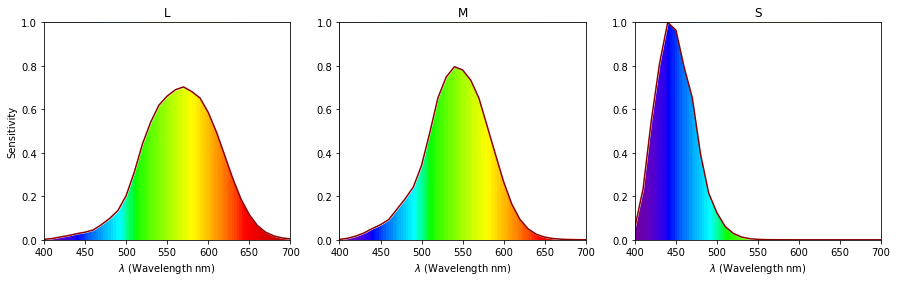

In [13]:
plt.figure(figsize=(15,4))
for i, channel in enumerate(('L', 'M', 'S')):
    plt.subplot(1,3,i+1)
    plot_spectrum(wavelengths, cone_sensitivity[:,i], ylabel='Sensitivity' if i==0 else None)
    plt.title(channel)

### Camera

The sillicon-based camera sensor is placed behind a filter which allows only certain wavelengths to go through. These filters (of which, uncodincidentally there are 3) correspond largely to <b>R</b>ed, <b>G</b>reen, <b>B</b>lue.


In [14]:
camera_sensitivity = np.load(resourse_path + 'camera_sensitivity.npy')
print(camera_sensitivity.shape)

(31, 3)


`camera_sensitivity` has 3 columns, each corresponding to the sentivity of the sensor when placed behind a different filter, measured at various wavelengths. These sensitivity curves are shown below:

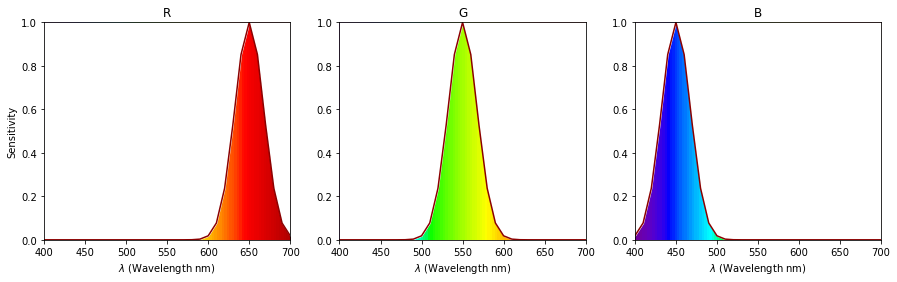

In [15]:
plt.figure(figsize=(15,4))
for i, channel in enumerate(('R', 'G', 'B')):
    plt.subplot(1,3,i+1)
    plot_spectrum(wavelengths, camera_sensitivity[:,i], ylabel='Sensitivity' if i==0 else None)
    plt.title(channel)

# Image formation

The final color response $\rho_\kappa$ or a sensor $\kappa$ with sensitivity $R_\kappa(\lambda)$ in response to light reflecting off a point $x$ with reflectance $S(x, \lambda)$, under a light source with spectral power distribution $E(\lambda)$ is:

$\rho_\kappa= \int_\lambda R(\lambda)S(x, \lambda)E(\lambda)~d\lambda$

Note that this model of the color response considers an intergral over a continuous spectrum. In practice, however, the response is computed discretely, by summing over $\lambda$ over a sampling grid $\Lambda$, e.g.:

$\rho_\kappa= \sum_{\lambda\in\Lambda} \lambda R(\lambda)S(x, \lambda)E(\lambda)~~~$ for $\Lambda = \{400 + i\cdot10 | 0\leq i\leq 30, i\in\mathcal{N}\}$

Fill in the code below to compute the an RGB image for the loaded scpetral image and illuminant.

In [17]:
R = np.sum(camera_sensitivity[:,0].reshape(-1,1,1) * 
           illuminant[np.isin(illuminant[:,0], wavelengths),1].reshape(-1,1,1) * 
           image, 0)
G = np.sum(camera_sensitivity[:,1].reshape(-1,1,1) * 
           illuminant[np.isin(illuminant[:,0], wavelengths),1].reshape(-1,1,1) * 
           image, 0)
B = np.sum(camera_sensitivity[:,2].reshape(-1,1,1) * 
           illuminant[np.isin(illuminant[:,0], wavelengths),1].reshape(-1,1,1) * 
           image, 0)
result = np.stack((R,G,B)).transpose(1,2,0)
result /= result.max() #normalize

`result` is now a valid RGB image and can be visualized

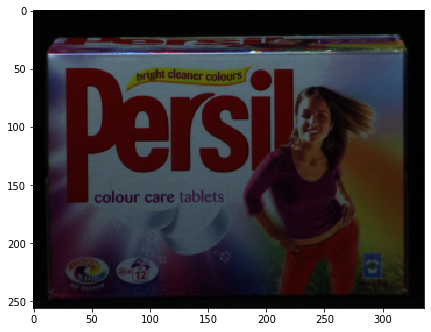

In [18]:
plt.figure(figsize=(7,6))
plt.imshow(result)

A little dark? That is because we have yet to apply gamma-correction, to compensate for how computer monitors iterpret RGB values.

In [19]:
corrected_result = result**(1/2.2)

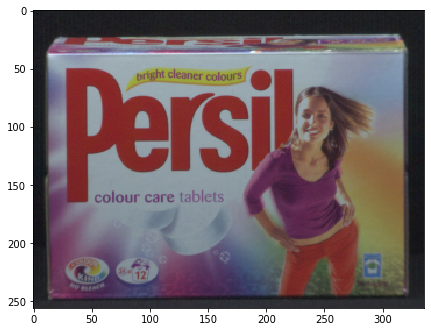

In [20]:
plt.figure(figsize=(7,6))
plt.imshow(corrected_result)

That's better!